In [1]:
%load_ext autoreload

%autoreload 2

import proplot as pplt
import numpy as np
import galsim

In [2]:
from pizza_cutter.slice_utils.interpolate import interpolate_image_and_noise

In [3]:
dim = 50
rng = np.random.RandomState(seed=10)
image = (
    np.random.normal(size=(dim, dim)) 
    + galsim.Gaussian(fwhm=0.9).withFlux(1e4).drawImage(nx=dim, ny=dim, scale=0.1).array
)
noise = np.random.normal(size=(dim, dim))
weight = np.ones_like(image)

bad_msk = np.zeros_like(image, dtype=np.int32)
if True:
    xcen = dim + 20
    ycen = dim - 20
    sr2 = 35**2
    for x in range(dim):
        for y in range(dim):
            r2 = (x-xcen)**2 + (y-ycen)**2
            if r2 < sr2:
                bad_msk[y, x] = 1
else:
    bad_msk[:, dim-10:] = 1

bad_msk[20, :] = 1
bad_msk |= np.rot90(bad_msk)
bad_flags = 1

image[bad_msk != 0] = np.nan

In [5]:
iimage, inoises = interpolate_image_and_noise(
    image=image,
    noises=[noise],
    weight=weight,
    bmask=bad_msk,
    bad_flags=bad_flags,
    rng=np.random.RandomState(seed=11),
    maxfrac=0.9,
    buff=4,
    fill_isolated_with_noise=False,
)

iimage_fill, inoises_fill = interpolate_image_and_noise(
    image=image,
    noises=[noise],
    weight=weight,
    bmask=bad_msk,
    bad_flags=bad_flags,
    rng=np.random.RandomState(seed=11),
    maxfrac=0.9,
    buff=4,
    fill_isolated_with_noise=True,
)

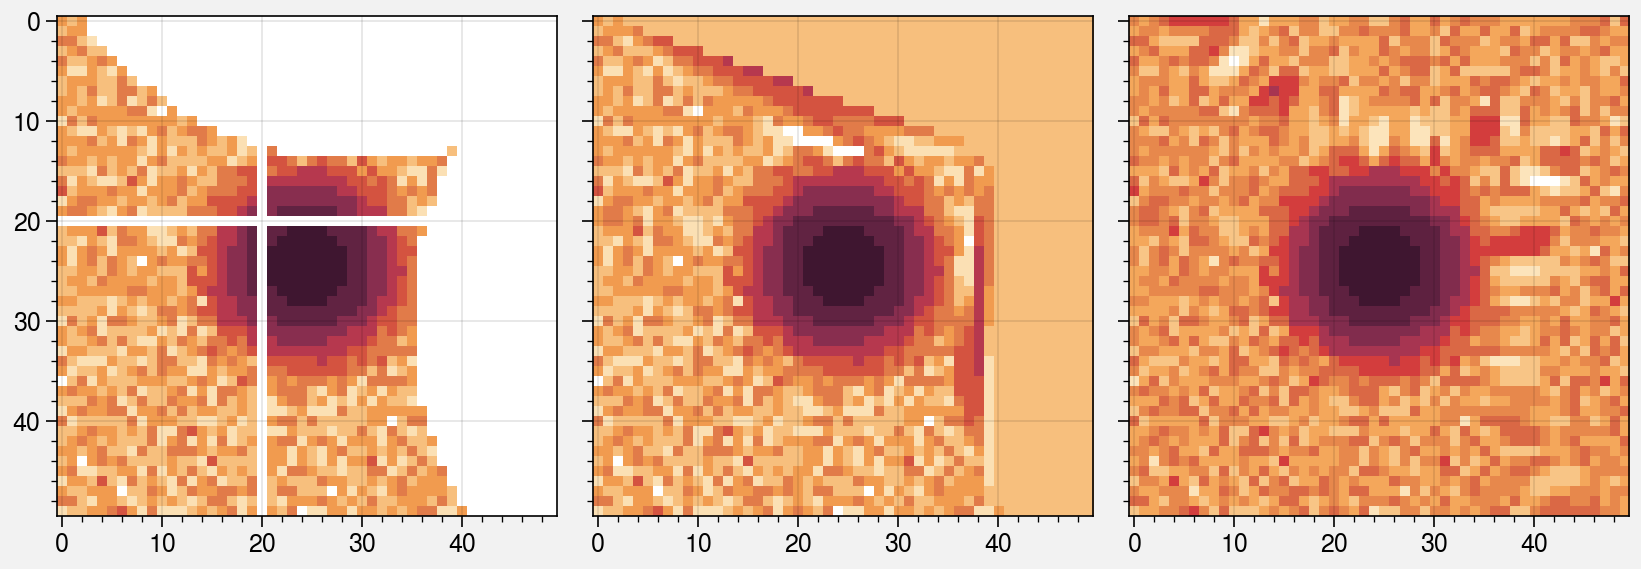

In [6]:
fig, axs = pplt.subplots(nrows=1, ncols=3)

axs[0].imshow(np.arcsinh(image))
axs[1].imshow(np.arcsinh(iimage))
axs[2].imshow(np.arcsinh(iimage_fill))